In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data_file = np.load('transaction_data.npz')

In [3]:
data_file

In [4]:
data = data_file['data']

In [5]:
data.shape

(40000, 2)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Custom Epanechnikov KDE class
class EpanechnikovKDE:
    def __init__(self, bandwidth=1.0):
        self.bandwidth = bandwidth
        self.data = None

    def fit(self, data):
        """Fit the KDE model with the given data."""
        self.data = np.array(data)  # shape (n_samples,dim=2)

    def epanechnikov_kernel(self, x, xi):
        """Epanechnikov kernel function."""
        if (np.linalg.norm(x - xi) / self.bandwidth) > 1:
            return 0
        return 3 / 4 * (1 - np.linalg.norm(x - xi) ** 2 / self.bandwidth ** 2)
    
    
        
    def evaluate(self, x):
        """Evaluate the KDE at point x."""
        if self.data is None:
            raise ValueError("Model not fitted yet.")
        return np.mean([self.epanechnikov_kernel(x, xi) for xi in self.data])
    

In [7]:
np.min(data[:,1]), np.max(data[:,1])

(-6.674052414128929, 6.194225030701654)

In [8]:
np.min(data[:,0]), np.max(data[:,0])

(-5.49485484595189, 5.70289266582742)

In [9]:
x_test = np.random.uniform(low=-6, high=6, size=(100, 2))

In [24]:
a = np.linspace(-6, 6, 10)
b = np.linspace(-6, 6, 10)
X, Y = np.meshgrid(a, b)

In [18]:
X.shape, Y.shape

((100, 100), (100, 100))

In [11]:
estimator = EpanechnikovKDE(bandwidth=1.0)

# TODO: Fit the data
estimator.fit(data)

In [25]:
Z = np.zeros((10, 10))
for i in range(10):
	for j in range(10):
		Z[i, j] = estimator.evaluate([X[i, j], Y[i, j]])

In [12]:
y_pred = np.array([estimator.evaluate(x) for x in x_test])

In [21]:
y_pred.shape

(100,)

In [33]:
data.shape, y_pred.shape

((40000, 2), (1000,))

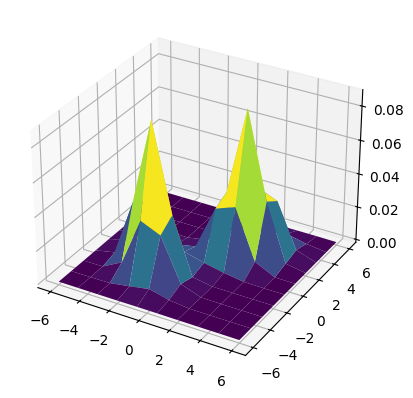

In [26]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X,Y,Z, cmap='viridis')